# Evolution of Lego

This project was inspired by YouTuber and Data Scientist Keith Galli.

* https://www.youtube.com/watch?v=BzQDi4D0B_M&ab_channel=KeithGalli

## Background

Lego is an extremely popular toy line that has diversified into movies, video games, and sub-brands. In the mid-90s, the company almost shut down due to floundering business, but was saved, in large part, due to the creation of the brand Bionicle. This analysis explores the history of Lego as a brand, and answers two key questions: 

### 1. What percentage of licensed Lego sets ever sold were Star Wars themed?

### 2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?

## Information on the data sets we're using:

### datasets/lego_sets.csv
* set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
* set_name: A name for every set in the dataset (note that this can be the same for different sets).
* year: The date the set was released.
* num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
* theme_name: The name of the sub-theme of the set.
* parent_theme: The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.
### datasets/parent_themes.csv
* id: A code that is unique to every theme.
* name: The name of the parent theme.
* is_licensed: A Boolean column specifying whether the theme is a licensed theme.

In [31]:
import pandas as pd
import seaborn as sns
import squarify 
import matplotlib.pyplot as plt

lego_sets = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

## Exploratory analysis

In [3]:
lego_sets

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


In [4]:
lego_sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [5]:
parent_theme

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
...,...,...,...
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True


In [6]:
parent_theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB


### Remove rows where "set_num" has an NaN value

In [7]:
lego_sets = lego_sets.dropna(subset = "set_num")

In [11]:
lego_sets["parent_theme"].value_counts()

Town              1116
Seasonal           928
Star Wars          609
Technic            536
Service Packs      456
                  ... 
Avatar               2
LEGO Exclusive       1
Universe             1
Disney               1
Ghostbusters         1
Name: parent_theme, Length: 109, dtype: int64

In [12]:
lego_sets[lego_sets["parent_theme"] == "Star Wars"]

,set_num,name,year,num_parts,theme_name,parent_theme
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars
...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars


### Determine which themes were actually licensed

In [23]:
is_licensed = parent_theme[parent_theme["is_licensed"] == True]

licensed_list = is_licensed["name"].tolist()
licensed_list

['Star Wars',
 'Harry Potter',
 'Pirates of the Caribbean',
 'Indiana Jones',
 'Cars',
 'Ben 10',
 'Prince of Persia',
 'SpongeBob SquarePants',
 'Toy Story',
 'Avatar',
 "Disney's Mickey Mouse",
 'Super Heroes',
 'The Hobbit and Lord of the Rings',
 'Teenage Mutant Ninja Turtles',
 'The Lone Ranger',
 'Minecraft',
 'Disney Princess',
 'Jurassic World',
 'Scooby-Doo',
 'Angry Birds',
 'Ghostbusters',
 'Disney']

### Check all parent_themes against licensed list, show only licensed sales

In [25]:
df = lego_sets[lego_sets["parent_theme"].isin(licensed_list)]
df

,set_num,name,year,num_parts,theme_name,parent_theme
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes
...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars


In [52]:
nums = df["parent_theme"].value_counts().tolist()
names = ['Star Wars',
 'Harry Potter',
 'Pirates of the Caribbean',
 'Indiana Jones',
 'Cars',
 'Ben 10',
 'Prince of Persia',
 'SpongeBob SquarePants',
 'Toy Story',
 'Avatar',
 "Disney's Mickey Mouse",
 'Super Heroes']
colors = ["#FFC312", "#C4E538", "#12CBC4", "#FDA7DF", "#ED4C67", "#F79F1F", "#A3CB38", "#1289A7", "#D980FA", "#B53471", "#009432", "#0652DD", "#9980FA", "#EA2027", "#006266"]
colors2 = ["red", "blue", "green", "yellow", "purple", "orange", "black", "pink"]

### Playing around with a new plot style in the squarify library

<AxesSubplot:>

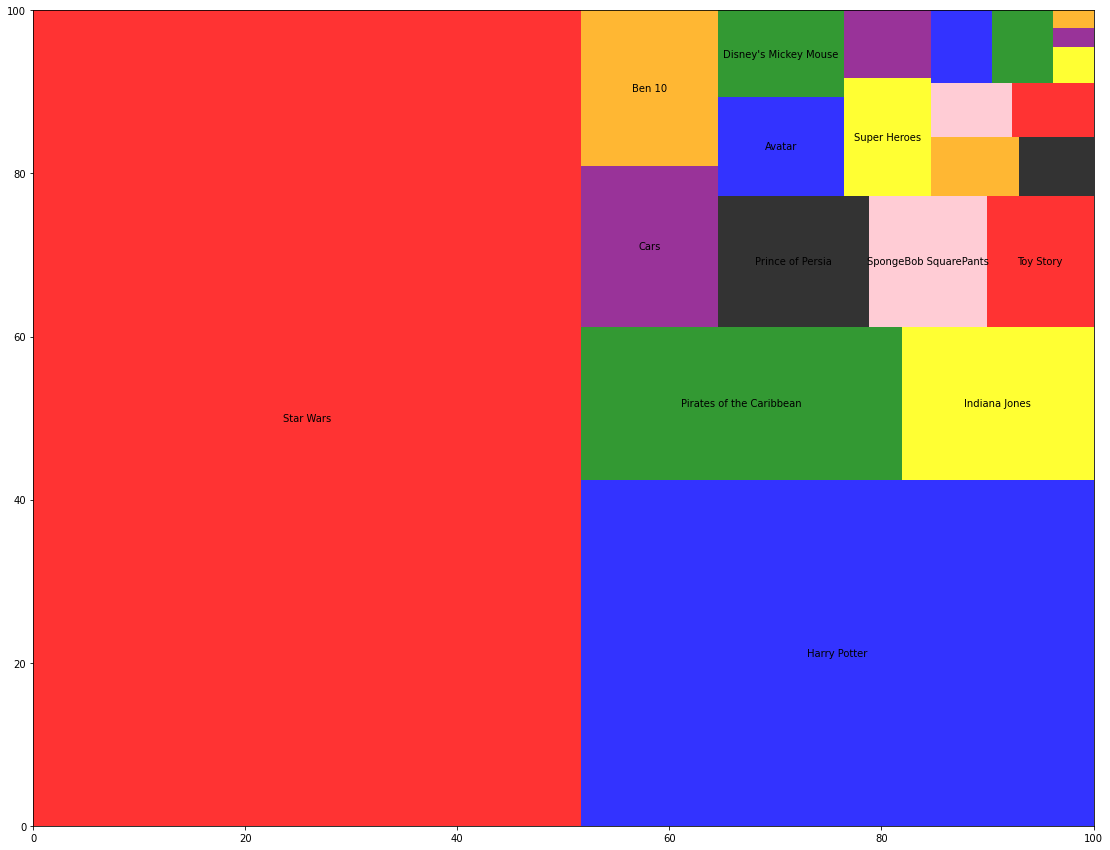

In [61]:
plt.figure(figsize = (19,15))
squarify.plot(sizes = nums, label = names, alpha = 0.8, color = colors2, text_kwargs = {"fontsize": 10})

#Squares without labels are still licensed lego sets, but I couldn't find a way to make their names fit

In [64]:
df["parent_theme"].value_counts() / df["parent_theme"].value_counts().sum()

Star Wars                           0.516539
Super Heroes                        0.205259
Harry Potter                        0.056828
The Hobbit and Lord of the Rings    0.033927
Minecraft                           0.025445
Disney Princess                     0.024597
Cars                                0.022901
Teenage Mutant Ninja Turtles        0.017812
Indiana Jones                       0.016115
Pirates of the Caribbean            0.014419
Toy Story                           0.012723
SpongeBob SquarePants               0.011874
The Lone Ranger                     0.006785
Jurassic World                      0.005937
Scooby-Doo                          0.005089
Disney's Mickey Mouse               0.005089
Prince of Persia                    0.005089
Angry Birds                         0.005089
Ben 10                              0.005089
Avatar                              0.001696
Disney                              0.000848
Ghostbusters                        0.000848
Name: pare

### Star Wars made up 52% of all licensed sales

# Question 2: In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?

In [155]:
df.groupby(["year"])["parent_theme"].value_counts() #inpecting here, wan't sure how to attack this part

year  parent_theme            
1999  Star Wars                   13
2000  Star Wars                   26
      Disney's Mickey Mouse        5
2001  Star Wars                   14
      Harry Potter                11
                                  ..
2017  Super Heroes                72
      Star Wars                   55
      Minecraft                    9
      Disney Princess              6
      Pirates of the Caribbean     1
Name: parent_theme, Length: 83, dtype: int64

### The solution below required some help from Keith

In [156]:
sorted = df.sort_values("year")

sorted["frequency"] = 1

frequencies = sorted.groupby(["year", "parent_theme"]).sum().reset_index() #use groupby to sum frequencies, then reset index so we can find the max of each year
frequencies

,year,parent_theme,num_parts,frequency
0,1999,Star Wars,1384.0,13
1,2000,Disney's Mickey Mouse,405.0,5
2,2000,Star Wars,2580.0,26
3,2001,Harry Potter,1284.0,11
4,2001,Star Wars,2949.0,14
...,...,...,...,...
78,2017,Disney Princess,347.0,6
79,2017,Minecraft,5264.0,9
80,2017,Pirates of the Caribbean,2286.0,1
81,2017,Star Wars,7583.0,55


In [157]:
#Sort by frequencies top to bottom, then drop the rows with duplicate years. This will remove the rows that are less than the max frequency.

frequencies.sort_values("frequency", ascending = False).drop_duplicates(["year"])

,year,parent_theme,num_parts,frequency
82,2017,Super Heroes,13123.0,72
76,2016,Star Wars,6934.0,61
67,2015,Star Wars,11410.0,58
59,2014,Star Wars,8293.0,45
47,2012,Star Wars,6769.0,43
32,2009,Star Wars,3953.0,39
52,2013,Star Wars,6159.0,35
9,2003,Star Wars,6660.0,32
42,2011,Star Wars,3451.0,32
36,2010,Star Wars,6003.0,30


### Star Wars was the top seller every year except 2017